In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
test_data=pd.read_csv("/content/test.csv")
train_data=pd.read_csv("/content/train.csv")

In [134]:
data = pd.concat([train_data, test_data], keys=['train', 'test'])

In [135]:
data

PassengerId  Survived  Pclass  \
train 0              1       0.0       3   
      1              2       1.0       1   
      2              3       1.0       3   
      3              4       1.0       1   
      4              5       0.0       3   
...                ...       ...     ...   
test  413         1305       NaN       3   
      414         1306       NaN       1   
      415         1307       NaN       3   
      416         1308       NaN       3   
      417         1309       NaN       3   

                                                        Name     Sex   Age  \
train 0                              Braund, Mr. Owen Harris    male  22.0   
      1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
      2                               Heikkinen, Miss. Laina  female  26.0   
      3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
      4                             Allen, Mr. William Henry    male  35.0   
...                                                      ...     ...   ...   
test  413                                 Spector, Mr. Woolf    male   NaN   
      414                       Oliva y Ocana, Dona. Fermina  female  39.0   
      415                       Saether, Mr. Simon Sivertsen    male  38.5   
      416                                Ware, Mr. Frederick    male   NaN   
      417                           Peter, Master. Michael J    male   NaN   

           SibSp  Parch              Ticket      Fare Cabin Embarked  
train 0        1      0           A/5 21171    7.2500   NaN        S  
      1        1      0            PC 17599   71.2833   C85        C  
      2        0      0    STON/O2. 3101282    7.9250   NaN        S  
      3        1      0              113803   53.1000  C123        S  
      4        0      0              373450    8.0500   NaN        S  
...          ...    ...                 ...       ...   ...      ...  
test  413      0      0           A.5. 3236    8.0500   NaN        S  
      414      0      0            PC 17758  108.9000  C105        C  
      415      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
      416      0      0              359309    8.0500   NaN        S  
      417      1      1                2668   22.3583   NaN        C  

[1309 rows x 12 columns]

In [136]:
data.isnull().sum()


PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [137]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [138]:
data = data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)

In [139]:
data

Survived  Pclass     Sex   Age  SibSp  Parch      Fare Embarked
train 0         0.0       3    male  22.0      1      0    7.2500        S
      1         1.0       1  female  38.0      1      0   71.2833        C
      2         1.0       3  female  26.0      0      0    7.9250        S
      3         1.0       1  female  35.0      1      0   53.1000        S
      4         0.0       3    male  35.0      0      0    8.0500        S
...             ...     ...     ...   ...    ...    ...       ...      ...
test  413       NaN       3    male   NaN      0      0    8.0500        S
      414       NaN       1  female  39.0      0      0  108.9000        C
      415       NaN       3    male  38.5      0      0    7.2500        S
      416       NaN       3    male   NaN      0      0    8.0500        S
      417       NaN       3    male   NaN      1      1   22.3583        C

[1309 rows x 8 columns]

In [140]:
imputer = SimpleImputer(strategy='mean')
data['Age'] = imputer.fit_transform(data[['Age']])



In [141]:
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

In [142]:
data.dropna(inplace=True)

In [143]:
X = data.drop('Survived', axis=1)
y = data['Survived']


In [144]:
print(X)

           Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
train 0         3    1  22.000000      1      0   7.2500         2
      1         1    0  38.000000      1      0  71.2833         0
      2         3    0  26.000000      0      0   7.9250         2
      3         1    0  35.000000      1      0  53.1000         2
      4         3    1  35.000000      0      0   8.0500         2
...           ...  ...        ...    ...    ...      ...       ...
      886       2    1  27.000000      0      0  13.0000         2
      887       1    0  19.000000      0      0  30.0000         2
      888       3    0  29.881138      1      2  23.4500         2
      889       1    1  26.000000      0      0  30.0000         0
      890       3    1  32.000000      0      0   7.7500         1

[891 rows x 7 columns]


In [145]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [146]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [147]:
ada = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=100, random_state=0)
ada.fit(X_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                   random_state=0)

In [160]:
prediction_set = ada.predict(X_train)
accuracy_train = accuracy_score(y_train, prediction_set)
print(accuracy_train)

0.9807383627608347


In [161]:
y_pred = ada.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Classifier Accuracy:", accuracy)

AdaBoost Classifier Accuracy: 0.7686567164179104


In [162]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred_log = log_reg.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", accuracy_lr)

Logistic Regression Accuracy: 0.8134328358208955


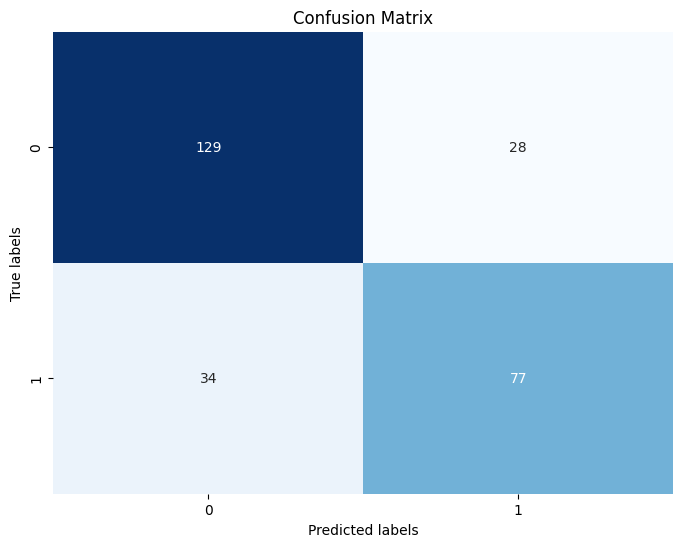

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.82      0.81       157
         1.0       0.73      0.69      0.71       111

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [163]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
y_pred = ada.predict(X_test)


cm = confusion_matrix(y_test, y_pred)

# confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


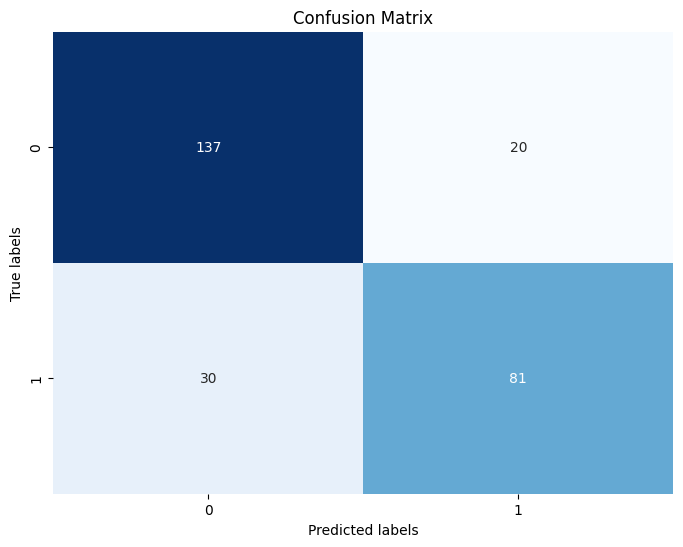

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.85       157
         1.0       0.80      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [165]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
y_pred = log_reg.predict(X_test)


cm = confusion_matrix(y_test, y_pred)

# confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
